In [1]:
import os
import sys

current_dir = os.getcwd()
src_path = os.path.join(current_dir, "../src-python")

if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
import cv2
import supervision as sv
from app.analysis.yard_line_detection import detect_yard_lines
from app.analysis.hash_mark_detection import detect_hash_marks
from app.analysis.player_detection import detect_players
from app.analysis.field_boundaries import process_full_field_bounds
from app.analysis.perspective_transform import transform_image
from app.analysis.field_positioning import classify_yard_lines_and_los
from app.analysis.formation_classifier import classify_formation
from app.analysis.artificial_pitch import draw_positions_on_artificial_pitch

In [3]:
GAME = "2108 BOISE STATE OFF vs COLORADO STATE"
PLAY = "049"
SNAP = 2

IMAGE_PATH = f"{src_path}/resources/games/{GAME}/snaps/play_{PLAY}_snap{SNAP}.jpg"
OUTPUT_DIR = f"{src_path}/resources/games/{GAME}/analysis"
os.makedirs(OUTPUT_DIR, exist_ok=True)

if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError(f"Image not found: {IMAGE_PATH}")

In [4]:
input_filename = os.path.basename(IMAGE_PATH)
input_name, _ = os.path.splitext(input_filename)

yard_lines_img = os.path.join(OUTPUT_DIR, f"{input_name}_DEBUG_yard_lines.jpg")
hash_marks_img = os.path.join(OUTPUT_DIR, f"{input_name}_DEBUG_hash_marks.jpg")
player_detections_img = os.path.join(OUTPUT_DIR, f"{input_name}_player_detection.jpg")
field_boundaries_img = os.path.join(OUTPUT_DIR, f"{input_name}_DEBUG_field_boundaries.jpg")
top_down_perspective = os.path.join(OUTPUT_DIR, f"{input_name}_DEBUG_top_down.jpg")
annotated_top_down = os.path.join(OUTPUT_DIR, f"{input_name}_annotated_top_down.jpg")
classified_yard_lines = os.path.join(OUTPUT_DIR, f"{input_name}_DEBUG_classified_yard_lines.jpg")
formation_result = os.path.join(OUTPUT_DIR, f"{input_name}_formation.json")
artificial_pitch = os.path.join(OUTPUT_DIR, f"{input_name}_top_down_artificial.jpg")

Mid Xs: [np.float64(4.126032548617417), np.float64(225.19248898286918), np.float64(441.4402322311206), np.float64(668.5549018087896), np.float64(888.5646715978182)]


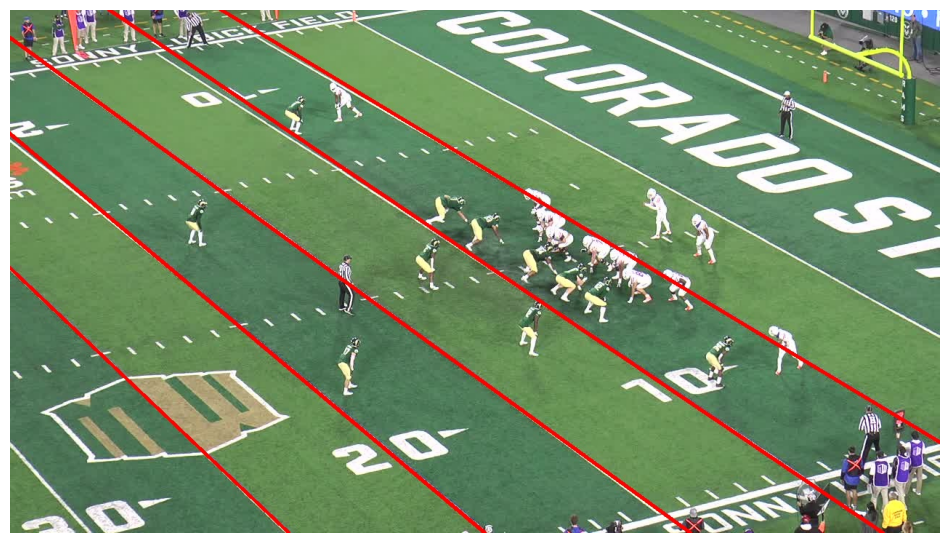

In [5]:
yard_lines = detect_yard_lines(IMAGE_PATH, yard_lines_img, max_degree=60)
yard_lines_vis = cv2.imread(yard_lines_img)
sv.plot_image(yard_lines_vis)

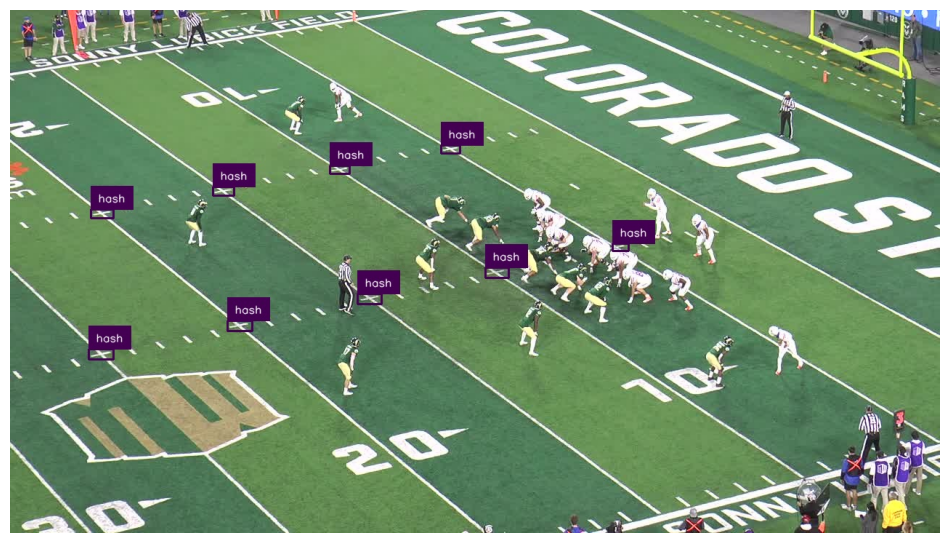

In [6]:
hash_mark_centers = detect_hash_marks(IMAGE_PATH, hash_marks_img)
hash_marks_vis = cv2.imread(hash_marks_img)
sv.plot_image(hash_marks_vis)

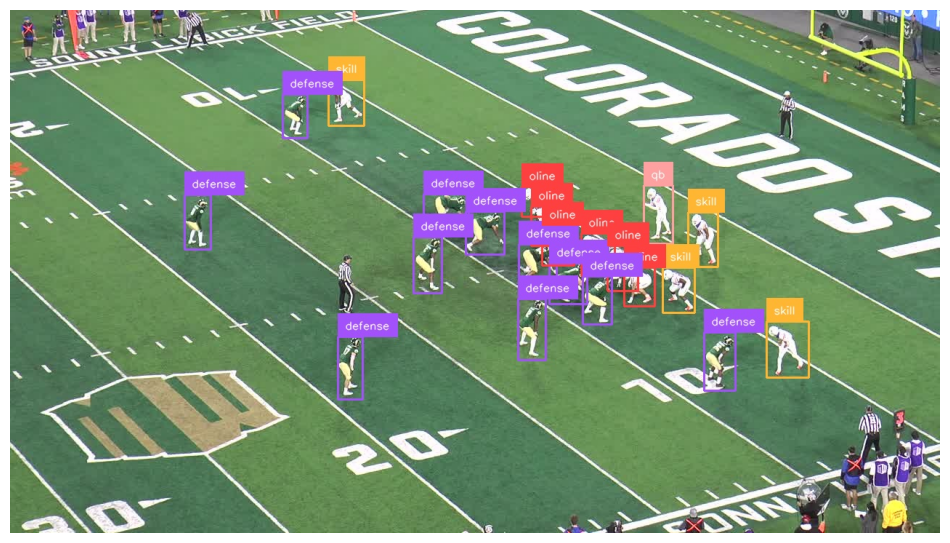

In [7]:
player_detections = detect_players(IMAGE_PATH, player_detections_img)
player_detections_vis = cv2.imread(player_detections_img)
sv.plot_image(player_detections_vis)

Initial players outside - Left: 0, Right: 2
Initial bounding lines at x: -86.7, 342.8
Total hash lines available: 4
Iteration 1: yard line amount: 4, distance: 20 feet
Players outside - Left: 0, Right: 0
Final yard line amount: 4, distance: 20 feet, iterations: 1


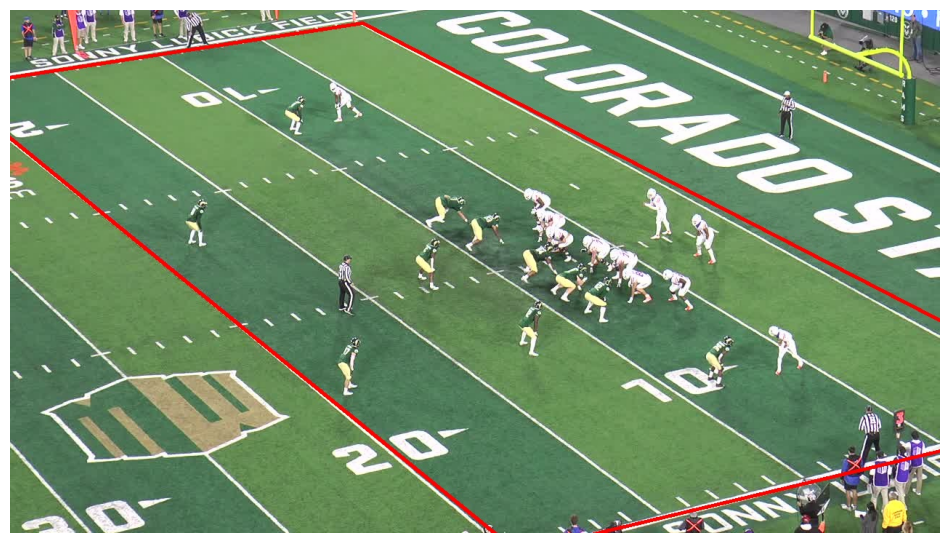

In [8]:
field_quad, yard_line_amount, yard_line_distance = process_full_field_bounds(
    IMAGE_PATH,
    field_boundaries_img,
    yard_lines,
    hash_mark_centers,
    player_detections,
    disable_estimation=False
)
field_boundaries_vis = cv2.imread(field_boundaries_img)
sv.plot_image(field_boundaries_vis)

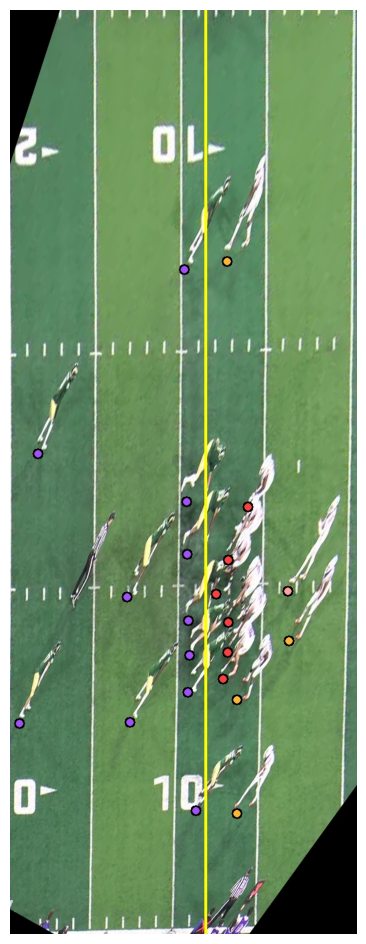

In [9]:
transformed_players, x_los = transform_image(IMAGE_PATH, top_down_perspective, annotated_top_down, field_quad, yard_line_distance, player_detections)

annotated_top_down_vis = cv2.imread(annotated_top_down)
sv.plot_image(annotated_top_down_vis)

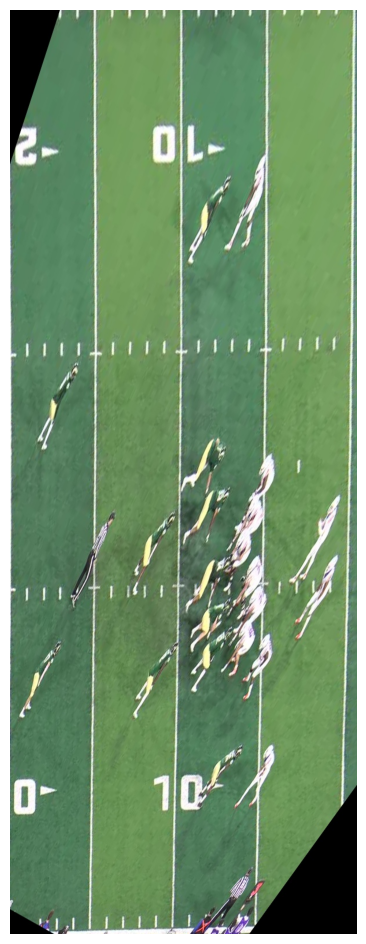

In [10]:
top_down_vis = cv2.imread(top_down_perspective)
sv.plot_image(top_down_vis)

2025-09-15 14:30:43,823 - FieldPositioning - DEBUG - Loaded template for number: BYU_1 from C:\Users\Justin.Getzke\IdeaProjects\football-pre-play-analysis\notebooks\..\src-python\resources\field_numbers\BYU_1.png
2025-09-15 14:30:43,825 - FieldPositioning - DEBUG - Loaded template for number: BYU_1_INV from C:\Users\Justin.Getzke\IdeaProjects\football-pre-play-analysis\notebooks\..\src-python\resources\field_numbers\BYU_1_INV.png
2025-09-15 14:30:43,827 - FieldPositioning - DEBUG - Loaded template for number: BYU_2 from C:\Users\Justin.Getzke\IdeaProjects\football-pre-play-analysis\notebooks\..\src-python\resources\field_numbers\BYU_2.png
2025-09-15 14:30:43,828 - FieldPositioning - DEBUG - Loaded template for number: BYU_2_INV from C:\Users\Justin.Getzke\IdeaProjects\football-pre-play-analysis\notebooks\..\src-python\resources\field_numbers\BYU_2_INV.png
2025-09-15 14:30:43,830 - FieldPositioning - DEBUG - Loaded template for number: BYU_3 from C:\Users\Justin.Getzke\IdeaProjects\foot

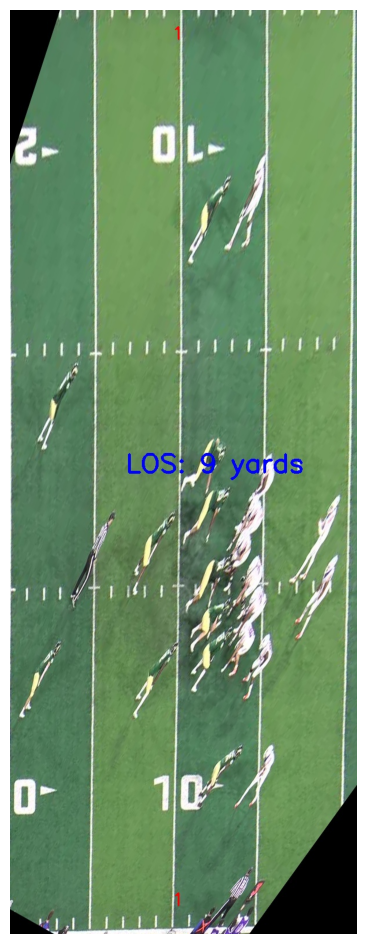

In [19]:
yard_line_numbers, los_yard, direction = classify_yard_lines_and_los(
    top_down_perspective,
    classified_yard_lines,
    x_los,
    threshold=0.7,
    numbers_dir=f"{src_path}/resources/field_numbers",
)
yard_numbers_img = cv2.imread(classified_yard_lines)
sv.plot_image(yard_numbers_img)

In [12]:
yard_line_numbers

[(300, 1), (300, 1)]

In [13]:
x_los

338

In [14]:
los_yard

11

In [15]:
transformed_players

[{'class': np.str_('skill'),
  'foot_position': (920, 417),
  'transformed_position': (392, 1194)},
 {'class': np.str_('defense'),
  'foot_position': (653, 337),
  'transformed_position': (306, 942)},
 {'class': np.str_('defense'),
  'foot_position': (600, 304),
  'transformed_position': (305, 851)},
 {'class': np.str_('skill'),
  'foot_position': (462, 160),
  'transformed_position': (375, 435)},
 {'class': np.str_('oline'),
  'foot_position': (866, 408),
  'transformed_position': (368, 1158)},
 {'class': np.str_('qb'),
  'foot_position': (892, 322),
  'transformed_position': (480, 1006)},
 {'class': np.str_('defense'),
  'foot_position': (392, 177),
  'transformed_position': (301, 449)},
 {'class': np.str_('skill'),
  'foot_position': (1070, 506),
  'transformed_position': (392, 1391)},
 {'class': np.str_('defense'),
  'foot_position': (574, 390),
  'transformed_position': (202, 1016)},
 {'class': np.str_('skill'),
  'foot_position': (953, 354),
  'transformed_position': (482, 1092)}

In [16]:
formation = classify_formation(formation_result, transformed_players, x_los)
print(formation)

FormationResult(personnel='12', lxr=(1, 1), te_side='', off_flag=False, label='12 – 1x1', details={'num_rb': 1, 'num_te_attached': 2, 'left_receivers': 1, 'right_receivers': 1, 'te_side': '', 'off_flag': False, 'attached_te_ids': ['oline5', 'oline6'], 'off_te_ids': [], 'rb_ids': [], 'wr_ids': ['skill1', 'skill2', 'skill3', 'skill4'], 'center_y_used': 1092, 'lt_y': 860, 'rt_y': 1194, 'oline_ids': ['skill1', 'oline1', 'oline2', 'oline3', 'oline4', 'oline5', 'oline6'], 'leftWR_ids': ['skill2'], 'rightWR_ids': ['skill3'], 'qb_ids': ['qb1', 'skill4']})


2025-09-15 14:29:33,903 - ArtificialPitch - DEBUG - Output image path: C:\Users\Justin.Getzke\IdeaProjects\football-pre-play-analysis\notebooks\../src-python/resources/games/2108 BOISE STATE OFF vs COLORADO STATE/analysis\play_049_snap2_top_down_artificial.jpg
2025-09-15 14:29:33,904 - ArtificialPitch - DEBUG - Number of player positions: 22
2025-09-15 14:29:33,905 - ArtificialPitch - DEBUG - Line of scrimmage X (transformed): 338
2025-09-15 14:29:33,906 - ArtificialPitch - DEBUG - Line of scrimmage Y (yards): 11
2025-09-15 14:29:33,907 - ArtificialPitch - DEBUG - Direction: left
2025-09-15 14:29:33,932 - ArtificialPitch - DEBUG - Line of scrimmage X position in pixels: 630


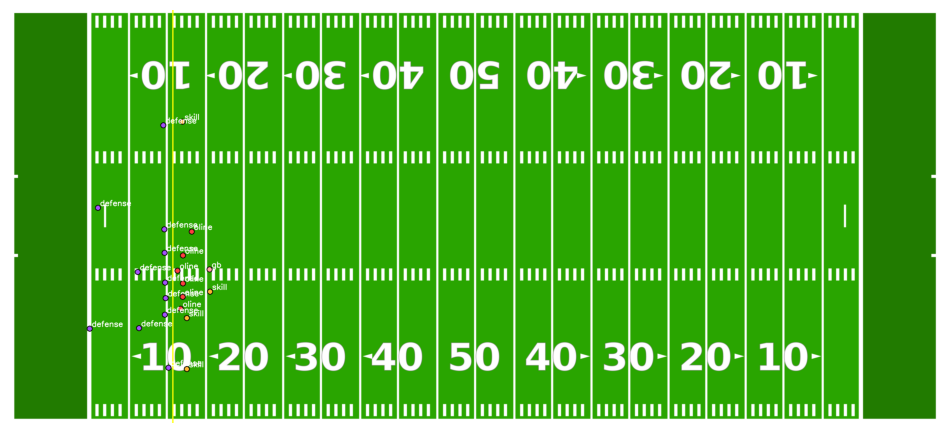

In [17]:
artificial_pitch_vis = draw_positions_on_artificial_pitch(
    artificial_pitch,
    transformed_players,
    x_los,
    los_yard,
    direction="left" if direction == 1 else "right",
    artificial_pitch_path=f"{src_path}/resources/artificial_pitch.png"
)
sv.plot_image(artificial_pitch_vis)